# **Linear Regression**
1. Investigating an artificial dataset of customers of an ecommerce company
2. Applying a shallow linear regression model to predict Yearly Amount Spent by customer

In [2]:
# standard imports/setup for jupyter
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [4]:
customers = pd.read_csv('data/Ecommerce Customers')
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


## Current dataset catagories-
### 5 numerical attributes
* Avg. Session Length
* Time on App
* Time of Membership
* Yearly amount spent
### 3 catagorical  attributes
* Email
* Address
* Avartar


In [5]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [7]:
customers.nunique() # 

Email                   500
Address                 500
Avatar                  138
Avg. Session Length     500
Time on App             500
Time on Website         500
Length of Membership    500
Yearly Amount Spent     500
dtype: int64

### Size of the dataset is small only 500 entries
one of the most important conclusions we can draw from our small sample size is that encoding our catagorical data. for instance we could perform some feature engineering in order to catagorise which email providers tend to have a larger spend or the effect of favourite colour. Since one hot encoding would essentially dilute our data size further ->Conclusion: inappropriate

## Exploratory Data Analysis

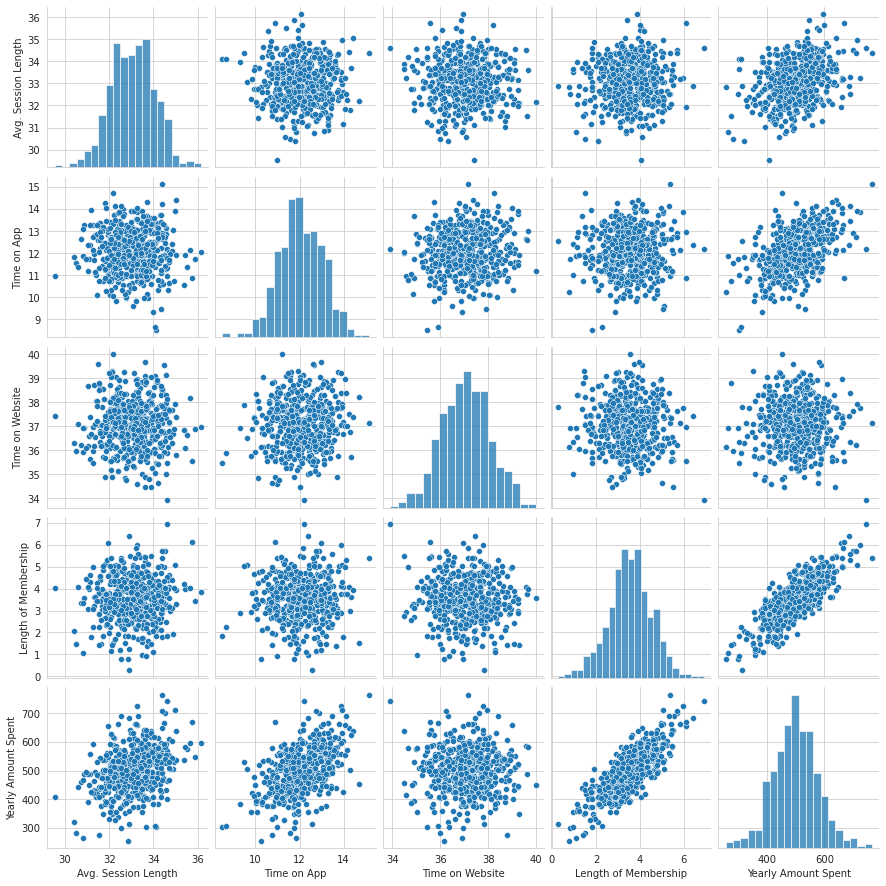

In [11]:
sns.pairplot(customers)

<AxesSubplot:>

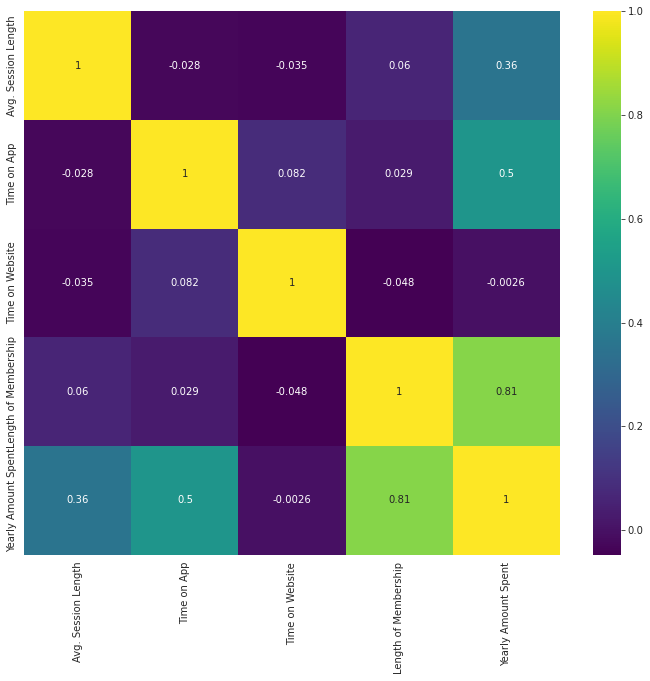

In [23]:
plt.figure(figsize=(12,10))
sns.heatmap(customers.corr(), annot=True, cmap='viridis')

## From our top-level evaluation of the data we can deduce that there is a strong correlation between Length of the membership and amount spent


(100.0, 900.0)

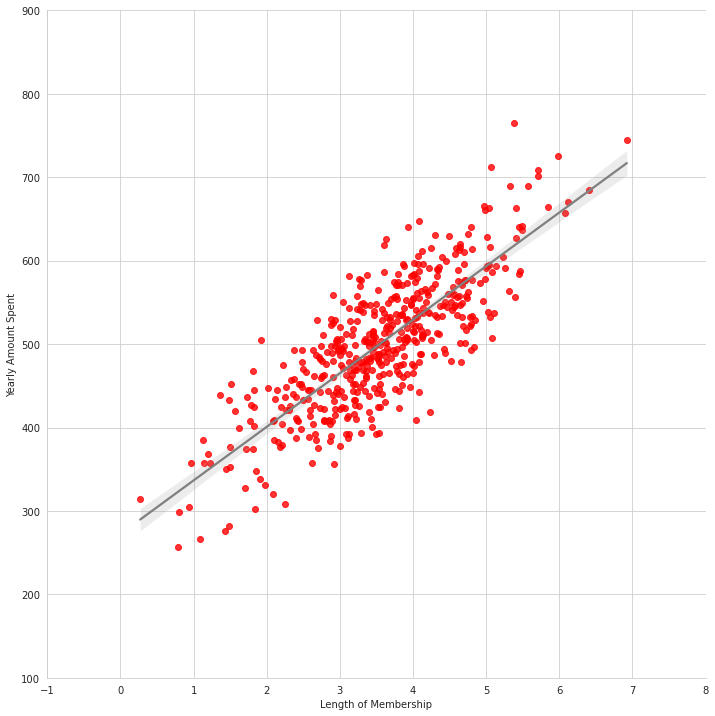

In [36]:
sns.lmplot(x='Length of Membership', y='Yearly Amount Spent', data=customers,scatter_kws={'color':'red'},line_kws={'color':'grey'}, height=10)
plt.xlim((-1,8))
plt.ylim((100,900))

## Training and Testing Data

### Manipulating Data for model

In [31]:
from sklearn.model_selection import train_test_split

In this model we will remove non numerical data from our feaures

In [32]:
X = customers[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]

Amount spent is our label 

In [33]:
y = customers['Yearly Amount Spent']

Splitting our data for fair evaluation of model performance

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Training

In [37]:
from sklearn.linear_model import LinearRegression 

In [38]:
lm = LinearRegression()

In [39]:
lm.fit(X_train, y_train)

LinearRegression()

Returning the coefficents between the features and our label

In [40]:
print(f'Coefficients:\n {lm.coef_}') 

Coefficients:
 [25.98154972 38.59015875  0.19040528 61.27909654]


coefficients in same order as our X data ['Avg. Session Length','Time on App','Time on Website','Length of Membership']

In [43]:
order = ['Avg. Session Length','Time on App','Time on Website','Length of Membership']
for n,feature in enumerate(order):
    if n==0:
        print('Coefficients:')
    print(f'{feature}: {lm.coef_[n]}')

Coefficients:
Avg. Session Length: 25.981549723495778
Time on App: 38.59015875311411
Time on Website: 0.19040527751101882
Length of Membership: 61.27909654482183


### Calculating and evaluating our predictions

In [45]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'Predicted Money Spent')

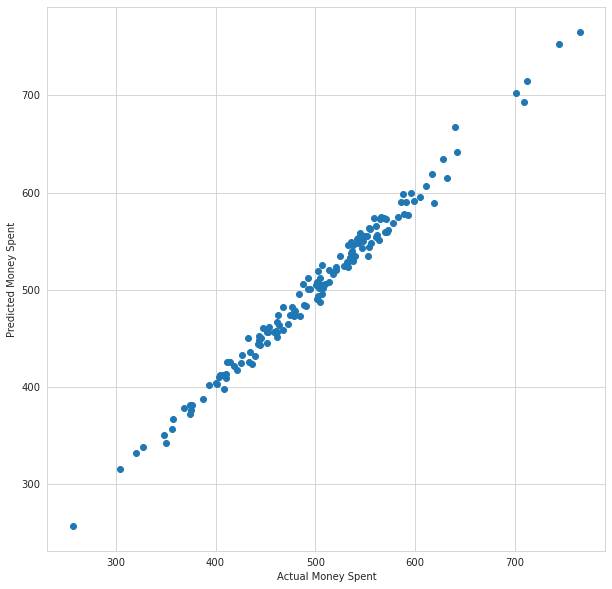

In [47]:
plt.figure(figsize=(10,10))
plt.scatter(x=y_test, y=predictions)
plt.xlabel('Actual Money Spent')
plt.ylabel('Predicted Money Spent')

## From a evaluation our model is accurate in it's predictions

In [48]:
from sklearn import metrics

In [49]:
print(f'MAE: {metrics.mean_absolute_error(y_test,predictions)}')
print(f'MSE: {metrics.mean_squared_error(y_test, predictions)}')
print(f'RMSE: {np.sqrt(metrics.mean_squared_error(y_test, predictions))}')

MAE: 7.228148653430832
MSE: 79.81305165097456
RMSE: 8.93381506697864


Mean squared error and root mean squared error punish larger deviations from the true value more

In [58]:
percentage_error = metrics.mean_absolute_error(y_test,predictions)/customers['Yearly Amount Spent'].mean()*100
print(f'mean percentage error: {percentage_error.round(2)}%')

mean percentage error: 1.45%


Overall we seem to have a really accurate model

## Residuals
- Plotting a histogram of residuals, should see a normal distribution

/home/oliver/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Density'>

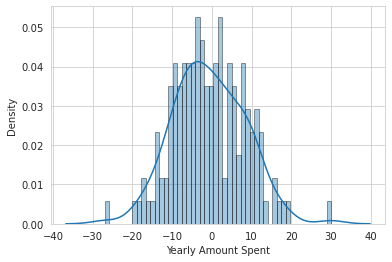

In [66]:
residuals = y_test-predictions
sns.distplot(residuals, bins=50,hist_kws={'edgecolor':'black'})

## Conclusion
What inferences can we make from our model?

In [68]:
coef_df = pd.DataFrame(data=lm.coef_, index=order, columns=['Coeff'])

In [69]:
coef_df

,Coeff
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


Interpretting this a possible question could be, should the company focus more on website or app developement?
If interpretting without context the strongest answer would be:
* Spend more developement time on the app as it will lead to a greater return on investment

Another answer could be the the website with context:
* The website is underperforming due to lack of developement, improve this and it will lead to greater return on invesment